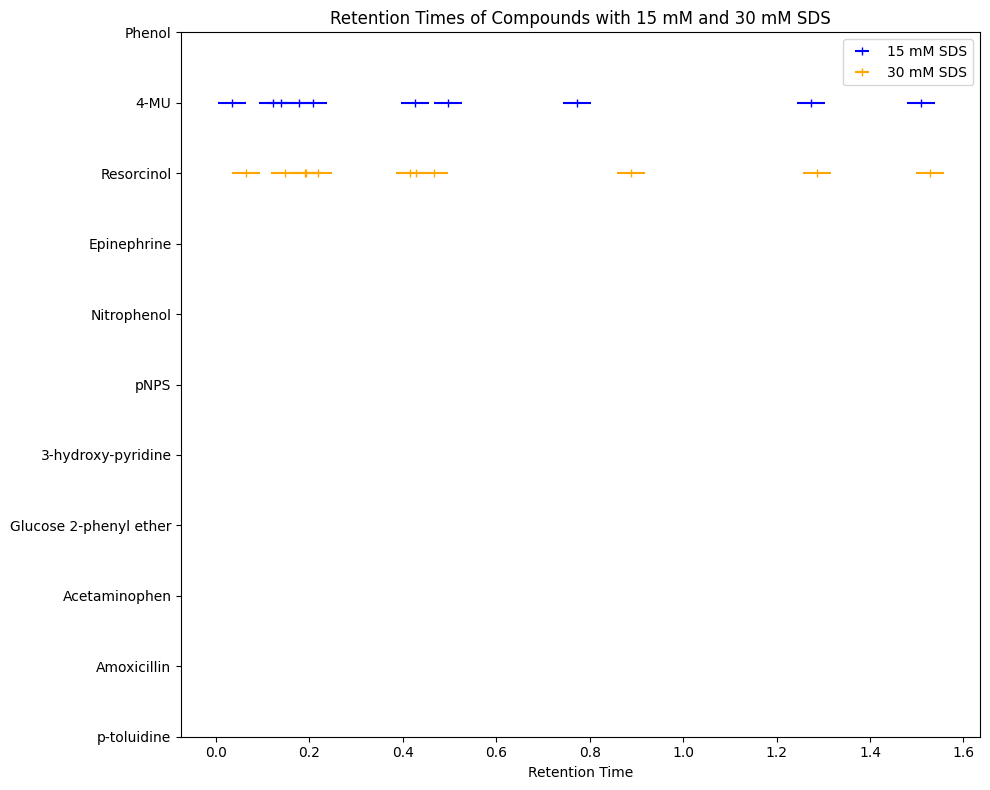

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Compounds corresponding to the retention times
compounds = [
    "Phenol", "4-MU", "Resorcinol", "Epinephrine", "Nitrophenol",
    "pNPS", "3-hydroxy-pyridine", "Glucose 2-phenyl ether", "Acetaminophen",
    "Amoxicillin", "p-toluidine"
]

# Retention times for 15 mM SDS and 30 mM SDS experiments
retention_times_15mM = [
    0.140151515, 0.772614402, 0.178242381, np.nan, 1.273784355,
    1.508492569, 0.497326203, 0.033515732, 0.121565934, 0.426409904, 0.208
]

retention_times_30mM = [
    0.218290119, 0.888324873, 0.192555476, 0.18993994, 1.287279152,
    1.527817404, 0.466470155, 0.064699609, 0.14781675, 0.414695341, 0.427488464
]

# Uncertainty or variability width
uncertainty_width = 0.03
bar_width = 0.4 # width for the separation between the 15mM and 30mM lines
index = np.arange(len(compounds))

# Plot settings
fig, ax = plt.subplots(figsize=(10, 8))

# Plot vertical lines for 15 mM SDS
for rt, y in zip(retention_times_15mM, index):
    ax.errorbar(rt, 1, xerr=uncertainty_width, fmt='|', color='blue', label='15 mM SDS')

# Plot vertical lines for 30 mM SDS
for rt, y in zip(retention_times_30mM, index):
    ax.errorbar(rt, 2, xerr=uncertainty_width, fmt='|', color='orange', label='30 mM SDS')

# Labeling the y-axis with compound names
ax.set_yticks(index)
ax.set_yticklabels(compounds)
ax.invert_yaxis()  # labels read top-to-bottom

# Adding labels and title
ax.set_xlabel('Retention Time')
ax.set_title('Retention Times of Compounds with 15 mM and 30 mM SDS')

# Adding legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles)) # Remove duplicate labels
ax.legend(by_label.values(), by_label.keys())

# Final adjustments and show plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_41077/1568129335.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["" for _ in compounds])  # Remove compound names to avoid clutter


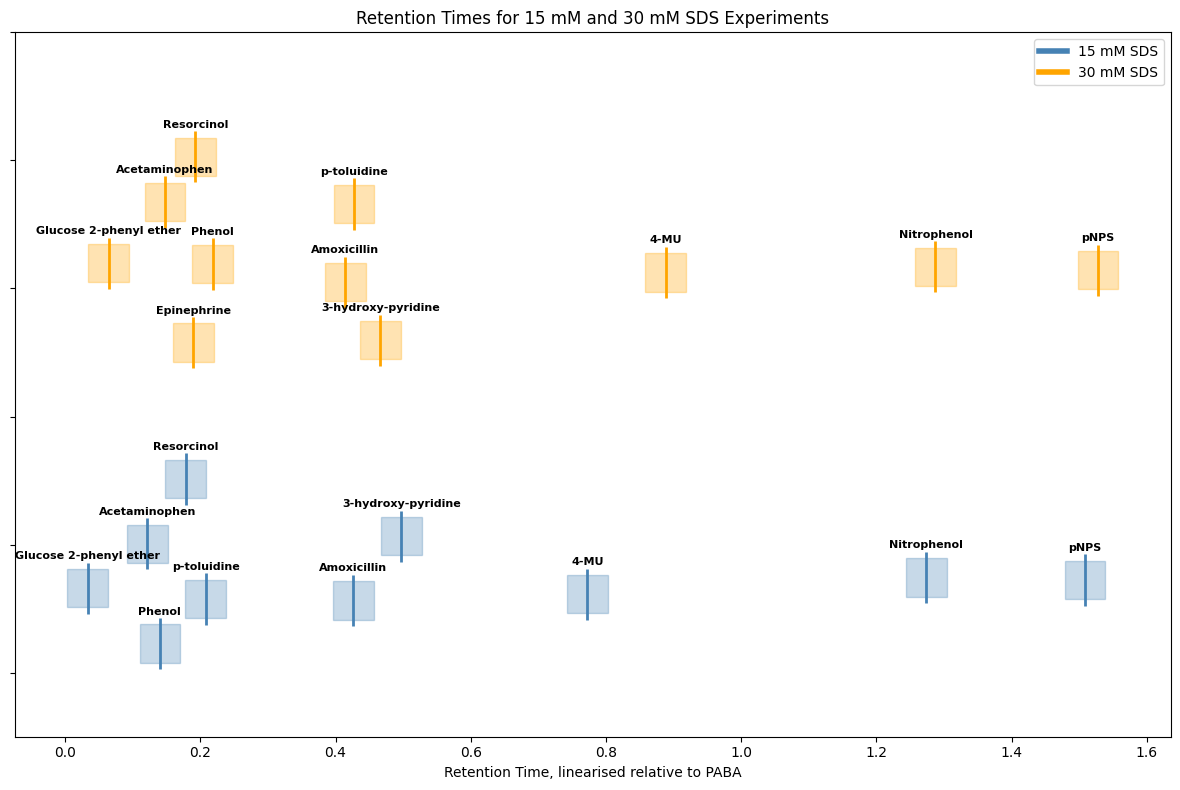

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.lines import Line2D  # Import Line2D for creating custom legend

# Compounds corresponding to the retention times
compounds = [
    "Phenol", "4-MU", "Resorcinol", "Epinephrine", "Nitrophenol",
    "pNPS", "3-hydroxy-pyridine", "Glucose 2-phenyl ether", "Acetaminophen",
    "Amoxicillin", "p-toluidine"
]

# Retention times for 15 mM SDS and 30 mM SDS experiments
retention_times_15mM = np.array([
    0.140151515, 0.772614402, 0.178242381, np.nan, 1.273784355,
    1.508492569, 0.497326203, 0.033515732, 0.121565934, 0.426409904, 0.208
])
data_15mM = np.column_stack((compounds, retention_times_15mM))
data_15mM = data_15mM[data_15mM[:, 1].argsort()]

retention_times_30mM = np.array([
    0.218290119, 0.888324873, 0.192555476, 0.18993994, 1.287279152,
    1.527817404, 0.466470155, 0.064699609, 0.14781675, 0.414695341, 0.427488464
])
data_30mM = np.column_stack((compounds, retention_times_30mM))
data_30mM = data_30mM[data_30mM[:, 1].argsort()]

# Uncertainty or variability width
uncertainty_width = 0.03

# Plot settings
fig, ax = plt.subplots(figsize=(12, 8))
index = np.arange(len(compounds))

def plot_retention_times(ax, data, color, start_y, uncertainty_width,experiment_name):
    lanes = [[]]
    for idx, element in enumerate(data):
        compound = element[0]
        try:
            time = float(element[1])
        except ValueError:
            continue  # Skip if time is not a number
        
        if not np.isnan(time):
            lane_occupied = True
            current_lane = 0
            while lane_occupied:
                if lanes[current_lane]:
                    lane = lanes[current_lane][-1]
                    if ((time - lane) < 0.15): 
                        current_lane += 1
                        if current_lane == len(lanes):
                            lanes.append([])  # Ensure there's a lane to move to
                    else:
                        lanes[current_lane].append(time)
                        break
                else:
                    lanes[current_lane].append(time)
                    break
            y_value = (lambda n: -(n // 2) if n % 2 == 0 else (n - 1) // 2 + 1)(current_lane) + start_y + random.uniform(0, 1)*0.5
            ax.vlines(time, y_value - 0.4, y_value + 0.4, colors=color, linewidth=2)
            rect = plt.Rectangle((time - uncertainty_width, y_value - 0.3), uncertainty_width * 2, 0.6, color=color, alpha=0.3)
            ax.add_patch(rect)
            ax.text(time, y_value+0.5, compound, color="black", ha="center", va="center", fontsize=8, fontweight='bold')


plot_retention_times(ax,data_15mM,"steelblue",1,uncertainty_width, "15 mM SDS")
plot_retention_times(ax,data_30mM,"orange",6,uncertainty_width, "30 mM SDS")
legend_elements = [Line2D([0], [0], color="steelblue", lw=4, label='15 mM SDS'),
                   Line2D([0], [0], color="orange", lw=4, label='30 mM SDS')]
ax.legend(handles=legend_elements, loc='upper right')

# Customize the y-axis
ax.set_yticklabels(["" for _ in compounds])  # Remove compound names to avoid clutter
ax.set_ylim(-1, 10)

# Customize the x-axis
ax.set_xlabel('Retention Time, linearised relative to PABA')

# Add title and legend
ax.set_title('Retention Times for 15 mM and 30 mM SDS Experiments')

# Display the plot
plt.tight_layout()
plt.savefig("retention_times.png", dpi=300)
plt.show()
